<a href="https://colab.research.google.com/github/RAV10K1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# **1) Reproducing Lesson Code**

In [37]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# Your Work Here

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Checking available styles in Seaborn & selecting appropriate style for the graphic
print(plt.style.available[0:10])
plt.style.use('fivethirtyeight')

['tableau-colorblind10', 'seaborn-muted', 'seaborn', 'dark_background', 'grayscale', 'seaborn-paper', 'seaborn-ticks', 'classic', 'seaborn-white', 'seaborn-bright']


In [40]:
# Reading data into Pandas
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Converting timestamps strings to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Assigning timestamp as unique identifier
df.set_index('timestamp', inplace=True)

In [43]:
df.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Filtering for last day
last_day = df['2017-08-29']

In [45]:
# Getting demographic breakdown for all IMDB users
last_day_filtered = last_day[last_day['category']=='IMDb users']
last_day_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [46]:
# Getting last row of data
final = last_day_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [47]:
# Getting Percentage Columns
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [48]:
# Resetting Index and renaming labels
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


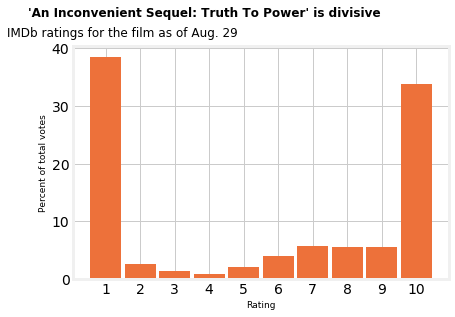

In [49]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

# 2) Reproducing another example from FiveThityEight's shared data repository.

In [50]:
# Obtaining image from website

url1 = 'https://fivethirtyeight.com/wp-content/uploads/2015/11/bialik-datalab-parisattacks-11.png?w=1150'
example1 = Image(url=url1, width=400)

display(example1)

In [51]:
# Downloading file from website
!wget https://projects.fivethirtyeight.com/data-webpage-data/datasets/terrorism.zip

--2020-01-24 19:15:40--  https://projects.fivethirtyeight.com/data-webpage-data/datasets/terrorism.zip
Resolving projects.fivethirtyeight.com (projects.fivethirtyeight.com)... 151.101.2.109, 151.101.66.109, 151.101.130.109, ...
Connecting to projects.fivethirtyeight.com (projects.fivethirtyeight.com)|151.101.2.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 906227 (885K) [application/zip]
Saving to: ‘terrorism.zip’

terrorism.zip       100%[===================>] 884.99K  --.-KB/s    in 0.04s   

2020-01-24 19:15:40 (19.4 MB/s) - ‘terrorism.zip’ saved [906227/906227]



In [52]:
%cd/content/sample_data

/content/sample_data


In [0]:
# Unzipping file
from zipfile import ZipFile
import zipfile

zipfilePath = ('/content/terrorism.zip')
zip = zipfile.ZipFile(zipfilePath)
zip.extractall(".")
zip.close()

In [0]:
# Loading data into dataframes
fr_ft_yr = pd.read_csv('/content/sample_data/terrorism/france_terrorism_fatalities_by_year.csv')
eu_ft_yr = pd.read_csv('/content/sample_data/terrorism/eu_terrorism_fatalities_by_year.csv')
eu_ft_cy = pd.read_csv('/content/sample_data/terrorism/eu_terrorism_fatalities_by_country.csv')

In [55]:
# Checking data frames
fr_ft_yr.head()

,iyear,fatalities
0,2014,1
1,2013,0
2,2012,8
3,2011,0
4,2010,0


In [56]:
eu_ft_yr.head()

,iyear,fatalities
0,2014,5
1,2013,6
2,2012,10
3,2011,4
4,2010,4


In [57]:
eu_ft_cy.head()

,iyear,Belgium,Denmark,France,Germany,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,United Kingdom
0,1970,0,0,0,0,2,1,0,0,0,0,0,20
1,1971,0,0,0,0,0,1,0,0,0,0,0,110
2,1972,0,0,1,0,0,6,1,0,0,0,2,368
3,1973,0,0,5,0,5,4,62,0,1,0,6,210
4,1974,0,0,3,0,92,34,26,0,1,0,19,234


In [0]:
# Obtaining data subset for Years 1970 to 2014 for all EU countries including France
df3 = eu_ft_cy.sort_values(by='iyear')
df4 = df3.iloc[0:16,:]
df4 = df4.sort_values(by='iyear', ascending=False)

In [59]:
# Dropping France Data to get values for rest of EU
df4 = df4.drop('France', axis=1)
df4

,iyear,Belgium,Denmark,Germany,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,United Kingdom
15,1985,10,1,0,64,2,19,0,0,1,70,64
14,1984,0,0,0,5,1,23,0,0,3,51,69
13,1983,2,0,0,4,5,2,0,0,8,42,77
12,1982,0,0,0,2,2,12,0,0,3,42,95
11,1981,6,0,0,3,2,24,0,0,2,39,86
10,1980,2,0,0,5,12,125,0,0,3,116,115
9,1979,1,0,0,1,9,24,0,3,3,112,133
8,1978,1,0,0,0,1,21,0,1,0,84,81
7,1977,0,0,0,1,2,25,0,9,0,44,103
6,1976,0,0,0,14,5,10,0,0,3,17,264


In [60]:
# Temporarily removing iyear column to calculate country aggregate figures for EU figure
df5 = df4.drop('iyear', axis=1)
# Aggregating fatalities of all countries into EU (Excluding France)
df5['fatalities'] = df5.sum(axis=1)
# Assigning values to list
agg = df5['fatalities'].to_list()
agg

[231, 152, 140, 156, 162, 378, 286, 189, 184, 313, 288, 406, 288, 377, 111, 23]

In [0]:
# Creating Separate List for Iyear
year_list = df4['iyear']

In [0]:
# Reinserting Year Column to Dataframe 
df5['iyear'] = year_list
cols = df5.columns.to_list()

In [63]:
# Dropping Country Name Columns
df5.drop(['Belgium',	'Denmark',	'Germany',	'Greece',	'Ireland',	'Italy',	'Luxembourg',	'Netherlands',	'Portugal',	'Spain',	'United Kingdom'], axis='columns')

,fatalities,iyear
15,231,1985
14,152,1984
13,140,1983
12,156,1982
11,162,1981
10,378,1980
9,286,1979
8,189,1978
7,184,1977
6,313,1976


In [64]:
# Reordering Columns
neworder = ['iyear','fatalities']
df5=df5.reindex(columns=neworder)
df5['iyear'] = year_list
cols = df5.columns.to_list()
df5

,iyear,fatalities
15,1985,231
14,1984,152
13,1983,140
12,1982,156
11,1981,162
10,1980,378
9,1979,286
8,1978,189
7,1977,184
6,1976,313


In [0]:
# Adding Subset into EU data from 1985 to 2014

df_EU = pd.concat([eu_ft_yr, df5],axis=0, sort=True)
df_EU = df_EU.sort_values(by='iyear', ascending=False)
df_EU.columns = ['European Union','iyear']

In [66]:
df_EU.head()

,European Union,iyear
0,5,2014
1,6,2013
2,10,2012
3,4,2011
4,4,2010


In [0]:
# Obtaining full data for France for 1970 to 2014
df_fr = df3[['iyear', 'France']].sort_values(by='iyear', ascending=False)

In [68]:
df_fr.head()

,iyear,France
44,2014,1
43,2013,0
42,2012,8
41,2011,0
40,2010,0


In [86]:
# Merging final dataframe

df_final = pd.merge(df_fr,df_EU,how='inner',on='iyear')
# Renaming columns
df_final.columns=['Year', 'France', 'European Union']
df_final.tail()

,Year,France,European Union
40,1974,3,406
41,1973,5,288
42,1972,1,377
43,1971,0,111
44,1970,0,23


In [88]:
df_final.T
df_final.head()

,Year,France,European Union
0,2014,1,5
1,2013,0,6
2,2012,8,10
3,2011,0,4
4,2010,0,4


In [70]:
# Arranging data into pivot table
df_all = df_final.pivot_table(index='Year', aggfunc='sum')
df_all.head()

,European Union,France
Year,,
1970,23,0
1971,111,0
1972,377,1
1973,288,5
1974,406,3


In [0]:
# Setting matplotlib visualization style to be used
plt.style.use('fivethirtyeight')

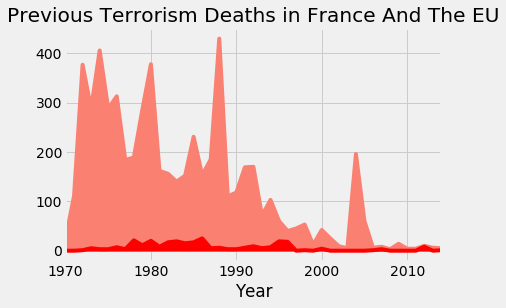

In [191]:
df_all.plot(color=['salmon','red'], title='Previous Terrorism Deaths in France And The EU', legend=False);
plt.fill_between(Year, EU, FR,
                 facecolor="salmon",
                 color='salmon',    
                 alpha=1)         
plt.fill_between(Year, FR, 0,
                 facecolor="red",
                 color='red',    
                 alpha=1);      


In [0]:
# Defining variables for plotting
Year = df_final['Year']
EU = df_final['European Union']
FR = df_final['France']

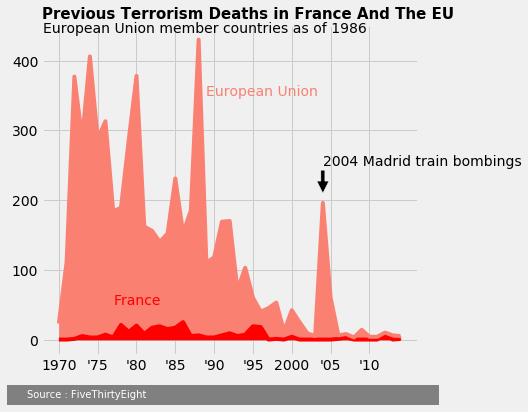

In [338]:
# Plotting graph based on finalized data

fig, ax = plt.subplots(figsize=(6,6))
# Potting Year Vs. France
ax.plot(Year, FR, 'r')
# Shading areas between plot-line and X-Axis
plt.fill_between(Year, EU, FR,
                 facecolor="salmon", # The fill color
                 color='salmon',       # The outline color
                 alpha=1)          # Transparency of the fill
# Plotting Year Vs. EU
ax.plot(Year, EU, 'salmon')
# Setting X and Y ticks on axes
ax.set_xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010])
ax.set_xticklabels(['1970', "'75", "'80", "'85", "'90", "'95", "2000", "'05", "'10"])
ax.set_yticks([0,100,200,300,400])
# Setting font dictionaries for title and subtitle
# Setting title and subtitle
ax.set_title('Previous Terrorism Deaths in France And The EU', fontsize=15, loc='left', fontweight='bold')
ax.text(x=1968, y=440, s='European Union member countries as of 1986')
#fig.suptitle('Previous Terrorism Deaths in France And The EU', ha='center')
# Shading areas between plot-line and X-Axis
plt.fill_between(Year, FR, 0,
                 facecolor="red",
                 color='red',
                 alpha=1);
# Making annotations in plot
ax.annotate('2004 Madrid train bombings', xy=(2004, 210), xytext=(2004, 250), arrowprops=dict(facecolor='black'))
ax.annotate('France', xy=(1977,50), color='red')
ax.annotate('European Union', xy=(1989,350), color='salmon')
# Inserting signature bar
def signaturebar(fig,text,fontsize=10,pad=5,xpos=20,ypos=7.5,
                 rect_kw = {"facecolor":"grey", "edgecolor":None},
                 text_kw = {"color":"w"}):
    w,h = fig.get_size_inches()
    height = ((fontsize+2*pad)/72.)/h
    rect = plt.Rectangle((0,0),1,height, transform=fig.transFigure, clip_on=False,**rect_kw)
    fig.axes[0].add_patch(rect)
    fig.text(xpos/72./h, ypos/72./h, text,fontsize=fontsize,**text_kw)
    fig.subplots_adjust(bottom=fig.subplotpars.bottom+height)

signaturebar(fig,"Source : FiveThirtyEight");

In [326]:
# Saving figure
plt.savefig('terrorism_replicated.png')

<Figure size 432x288 with 0 Axes>

In [80]:
display(example1)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here